Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StanModels
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path_s("..", "scripts", "08")
cd(ProjDir)

### snippet 8.25

In [3]:
N = 100                                                    # individuals
height  = rand(Normal(10,2), N) ;              # sim total height of each
leg_prop = rand(Uniform(0.4,0.5), N);      # leg as proportion of height

sim left leg as proportion + error

In [4]:
leg_left = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

sim right leg as proportion + error

In [5]:
leg_right = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

combine into data frame

In [6]:
df =  DataFrame(height=height, leg_left = leg_left, leg_right = leg_right);

Show first 5 rows

In [7]:
first(df, 5)

,height,leg_left,leg_right
,Float64,Float64,Float64
1,9.83397,4.27089,4.24441
2,10.0728,4.51826,4.5194
3,11.0601,5.21432,5.20029
4,6.20787,3.03562,3.06688
5,11.0128,5.16871,5.2319


Define the Stan language model

In [8]:
m_5_8 = "
data{
    int N;
    real height[N];
    real leg_right[N];
    real leg_left[N];
}
parameters{
    real a;
    real bl;
    real br;
    real sigma;
}
model{
    vector[N] mu;
    sigma ~ cauchy( 0 , 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:100 ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [9]:
stanmodel = Stanmodel(name="m_5_8", monitors = ["a", "br", "bl", "sigma"],
  model=m_5_8, output_format=:mcmcchains);
# Input data for cmdstan
m_8_8_data = Dict("N" => size(df, 1), "height" => df[:height],
    "leg_left" => df[:leg_left], "leg_right" => df[:leg_right]);
# Sample using cmdstan
rc, chn, cnames = stan(stanmodel, m_8_8_data, ProjDir, diagnostics=false,
  summary=false, CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


File /Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan will be updated.

Log evidence      = 0.0
Iterations        = 1:1000
Thinning interval = 1
Chains            = Chain1, Chain2, Chain3, Chain4
Samples per chain = 1000
parameters        = a, bl, br, sigma

Empirical Posterior Estimates:
parameters
        Mean    SD   Naive SE  MCSE   ESS
    a  1.2112 0.3013   0.0048 0.0057 1000
   bl  2.4654 2.3046   0.0364 0.0649 1000
   br -0.5374 2.3021   0.0364 0.0648 1000
sigma  0.6215 0.0454   0.0007 0.0009 1000

Quantiles:
parameters
        2.5%   25.0%   50.0%   75.0%  97.5% 
    a  0.1512  1.0080  1.2129 1.4172  2.3731
   bl -5.3657  0.9044  2.4738 3.9871 10.4910
   br -8.6664 -2.0783 -0.5454 1.0211  7.2324
sigma  0.4833  0.5893  0.6196 0.6518  0.8154



Plot the density of posterior draws

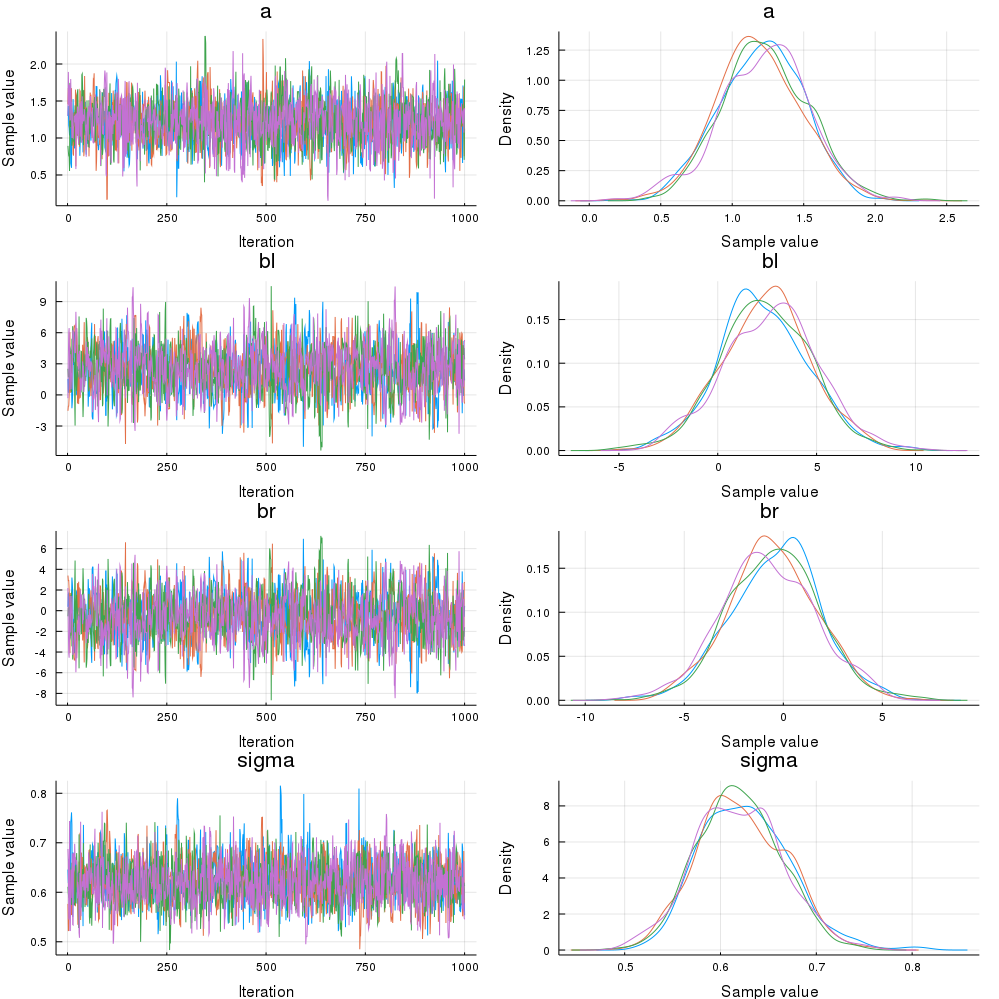

In [10]:
plot(chn)

Autocorrelation

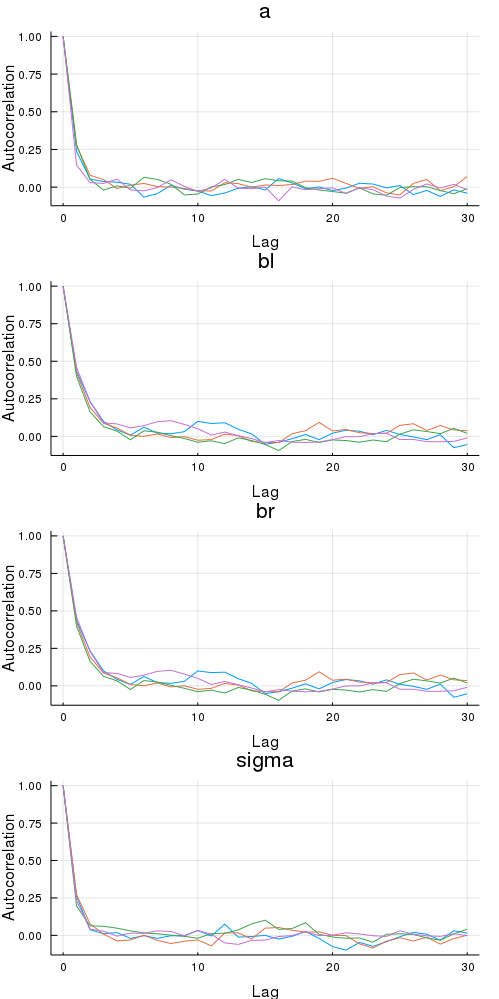

In [11]:
autocorplot(chn)

End of `08/m8.8s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*